In [20]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv", on_bad_lines="warn")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-22 10:00:00"]
df = df[~df.output.isin(["Authentication failed."]) & (~df.output.str.startswith(("Traceback (most recent call last):", "[Errno", "Error reading SSH protocol banner")))]
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-22 12:01:40.004723,130.216.216.179,10.865771,2023-11-21 23:00:02.632515: I tensorflow/core/...,2023-11-22 12:01:40.004723
2023-11-22 12:01:40.004723,130.216.216.196,10.725430,2023-11-22 12:00:02.507304: I tensorflow/core/...,2023-11-22 12:01:40.004723
2023-11-22 12:01:40.004723,130.216.217.65,98.145551,2023-11-21 23:00:02.609378: I tensorflow/core/...,2023-11-22 12:01:40.004723
2023-11-22 12:01:40.004723,130.216.217.127,10.899214,2023-11-22 12:00:02.571196: I tensorflow/core/...,2023-11-22 12:01:40.004723
2023-11-22 12:06:40.548496,130.216.216.179,10.861219,2023-11-21 23:05:03.003873: I tensorflow/core/...,2023-11-22 12:06:40.548496
...,...,...,...,...
2023-11-23 10:21:39.970468,130.216.216.196,10.720291,2023-11-23 10:20:02.194339: I tensorflow/core/...,2023-11-23 10:21:39.970468
2023-11-23 10:21:39.970468,130.216.217.65,98.419383,2023-11-22 21:20:02.323387: I tensorflow/core/...,2023-11-23 10:21:39.970468
2023-11-23 10:21:39.970468,130.216.217.127,10.889758,2023-11-23 10:20:02.253315: I tensorflow/core/...,2023-11-23 10:21:39.970468


In [21]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-22 12:01:40.004723,130.216.216.179,10.865771,2023-11-21 23:00:02.632515: I tensorflow/core/...,2023-11-22 12:01:40.004723,0.117,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-22 12:01:40.004723,130.216.216.196,10.725430,2023-11-22 12:00:02.507304: I tensorflow/core/...,2023-11-22 12:01:40.004723,0.104,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-22 12:01:40.004723,130.216.217.65,98.145551,2023-11-21 23:00:02.609378: I tensorflow/core/...,2023-11-22 12:01:40.004723,87.423,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-22 12:01:40.004723,130.216.217.127,10.899214,2023-11-22 12:00:02.571196: I tensorflow/core/...,2023-11-22 12:01:40.004723,0.212,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-22 12:06:40.548496,130.216.216.179,10.861219,2023-11-21 23:05:03.003873: I tensorflow/core/...,2023-11-22 12:06:40.548496,0.117,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-23 10:21:39.970468,130.216.216.196,10.720291,2023-11-23 10:20:02.194339: I tensorflow/core/...,2023-11-23 10:21:39.970468,0.105,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-23 10:21:39.970468,130.216.217.65,98.419383,2023-11-22 21:20:02.323387: I tensorflow/core/...,2023-11-23 10:21:39.970468,87.477,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-23 10:21:39.970468,130.216.217.127,10.889758,2023-11-23 10:20:02.253315: I tensorflow/core/...,2023-11-23 10:21:39.970468,0.211,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2


In [22]:
df.groupby("serials").bitshift.mean()

serials
1322122007252                   0.000000
1322822261453                   0.635688
1323022014403, 1323022014449    0.000000
1323022015019                   0.620000
1652422032676                   0.000000
1652422032681, 1322122007042    0.000000
Name: bitshift, dtype: float64

In [23]:
df.IP[df.tf_detected_GPUs == 2].value_counts()

130.216.217.127    269
130.216.216.117    222
Name: IP, dtype: int64

serials
1322122007252                   Axes(0.125,0.2;0.775x0.68)
1322822261453                   Axes(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    Axes(0.125,0.2;0.775x0.68)
1323022015019                   Axes(0.125,0.2;0.775x0.68)
1652422032676                   Axes(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    Axes(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

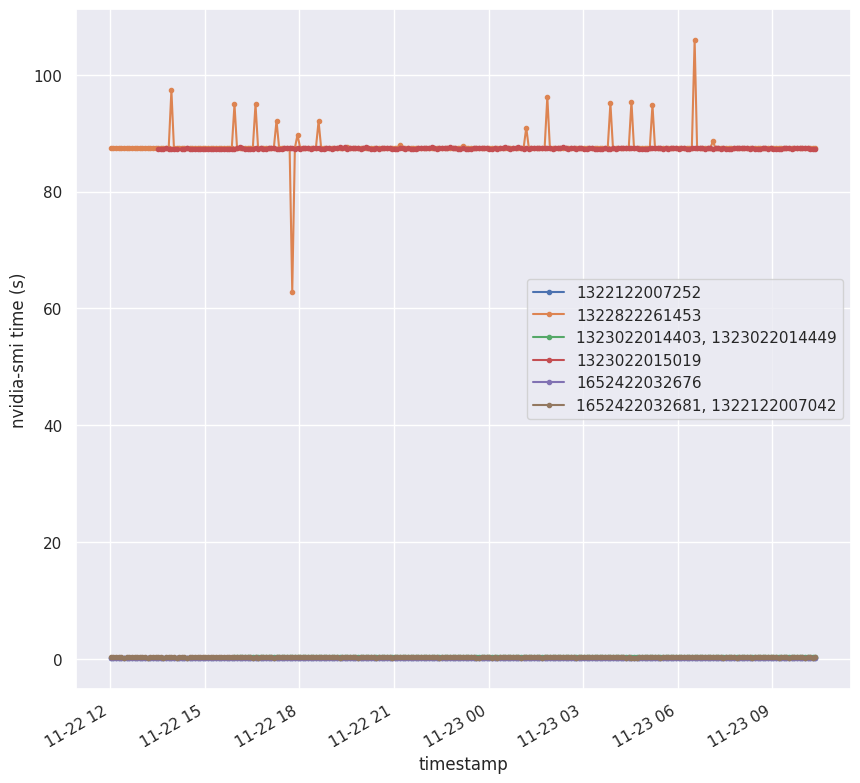

In [24]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [25]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,269.0,0.118253,0.002392,0.111,0.117,0.118,0.119,0.129
1322822261453,269.0,87.695658,2.330528,62.854,87.423,87.445,87.467,105.945
"1323022014403, 1323022014449",222.0,0.270486,0.004210,0.262,0.268,0.270,0.273,0.282
1323022015019,250.0,87.375132,0.057989,87.252,87.339,87.371,87.398,87.562
1652422032676,269.0,0.102751,0.004312,0.095,0.101,0.102,0.104,0.160
"1652422032681, 1322122007042",269.0,0.213483,0.006028,0.204,0.210,0.212,0.214,0.233


In [26]:
df.to_excel("results.xlsx")

IllegalCharacterError: 